__Implementation of K-means clustering__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.float_format = '{:.6f}'.format

In [31]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df_cust = pd.read_csv('data/customer.csv') # load the csv file and store the data in 'df_cust'

df_cust.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [5]:
print(df_cust.shape)

df_cust.dtypes

(200, 5)


Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

In [6]:
# The variable `Sex` is categorical as per the data definition, but it is considered as an interger. 

df_cust['Sex'] = df_cust['Sex'].astype('object')
df_cust.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [10]:
df_cust.nunique()

Cust_Number         200
Yearly_Income        64
Age                  54
Cust_Spend_Score     87
Sex                   2
dtype: int64

In [11]:
# The column `Cust_Number` contains the unique ID of each customer, which is redundant for further analysis. Thus, we drop the column.

df_cust = df_cust.drop('Cust_Number',axis=1) # 'axis = 1' drops the specified column

In [12]:
df_cust.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


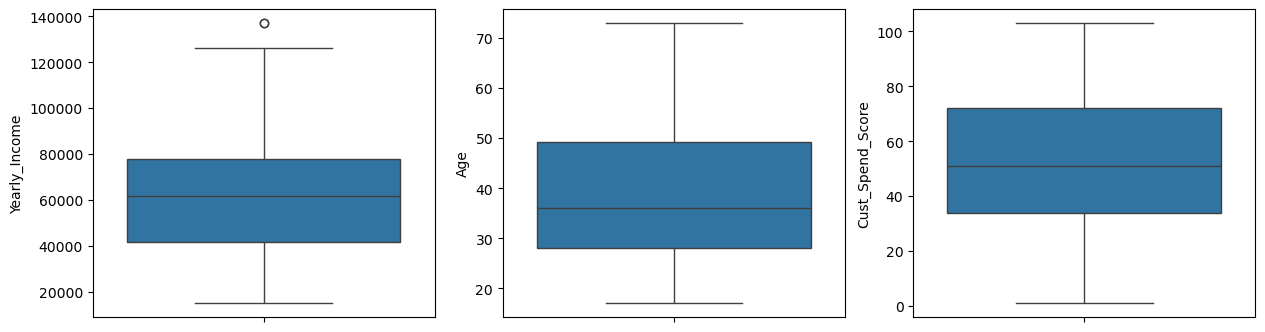

In [13]:
# Let's check the outliers in all the variables and treat them using appropriate techniques

df_num = df_cust.drop(['Sex'], axis = 1)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df_cust[variable], ax = subplot)

plt.show()

In [15]:
# We can see that an outlier is present in the variable `Yearly_Income`. Before clustering, we remove this outlier

df_cust = df_cust[df_cust['Yearly_Income'] < 130000] # consider the observations with yearly income less than 130000

df_cust['Yearly_Income'].describe()

count      198.000000
mean     59787.878788
std      25237.259027
min      15000.000000
25%      40500.000000
50%      61000.000000
75%      77750.000000
max     126000.000000
Name: Yearly_Income, dtype: float64

**Let's check the missing values and their percentage for each column. Then choose the right approach to treat them.**

In [20]:
Total = df_cust.isnull().sum().sort_values(ascending=False)
Percent = (df_cust.isnull().sum()*100/df_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage'])    
missing_data

,Total,Percentage
Yearly_Income,0,0.000000
Age,0,0.000000
Cust_Spend_Score,0,0.000000
Sex,0,0.000000


We'll perform kmeans on the variables `Cust_Spend_Score` and `Yearly_Income`. We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [21]:
X_filtered = df_cust[['Cust_Spend_Score', 'Yearly_Income']]
X_filtered.head()

,Cust_Spend_Score,Yearly_Income
0,44,15000
1,79,15000
2,8,16000
3,79,16000
4,41,17000


In [22]:
# StandardScaler

X_norm = StandardScaler()
num_norm = X_norm.fit_transform(X_filtered)
X = pd.DataFrame(num_norm, columns = X_filtered.columns)
X.head()

,Cust_Spend_Score,Yearly_Income
0,-0.283684,-1.779171
1,1.068399,-1.779171
2,-1.674398,-1.739447
3,1.068399,-1.739447
4,-0.399577,-1.699723


__Clustering__

K-Means is the centroid-based clustering algorithm and it's sensitive to initial conditions and outliers. 

We'll use  two techniques to decide the optimal value of `K` to perform the K-means clustering :- 

1. Elbow/scree plot
2. Silhouette score


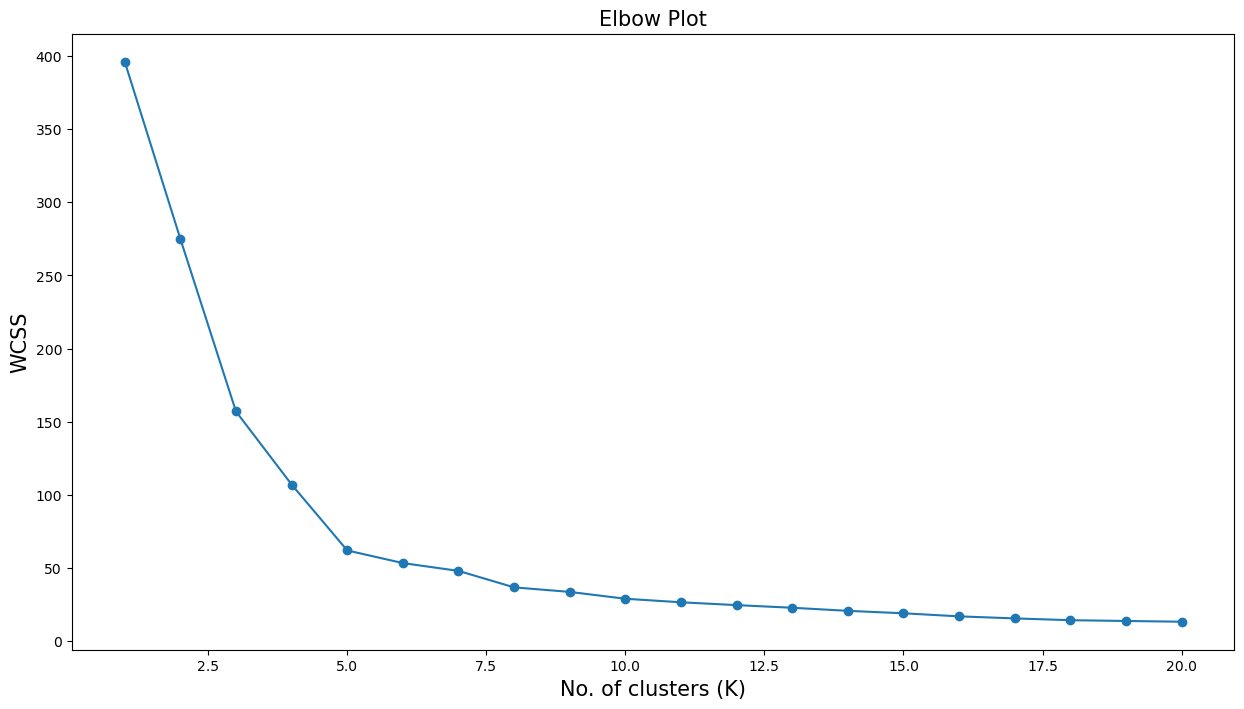

In [37]:
''' 
Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. 
The value of K corresponding to the elbow point represents the optimal value for K.
'''

wcss  = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10) # set the 'random_state' to obtain the same centroid initialization for each code run
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # the 'inertia_' retuns the WCSS for specific value of K


plt.plot(range(1,21), wcss, marker = "o" )
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

We can see that the for K = 5, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly.


Now, let us use the silhouette score method to identify the optimal value of K.

In [26]:
''' 
The Silhouette score can also be used to identify the optimal number of clusters. 
We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of 
clusters (K).
'''

n_clusters = [2, 3, 4, 5, 6, 7, 8]

for K in n_clusters:
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.38458088288594816)
For 3 clusters the silhouette score is 0.46170520504723656)
For 4 clusters the silhouette score is 0.494107331328402)
For 5 clusters the silhouette score is 0.558228958898334)
For 6 clusters the silhouette score is 0.5382571451087418)
For 7 clusters the silhouette score is 0.49597473990814783)
For 8 clusters the silhouette score is 0.45543289610740395)


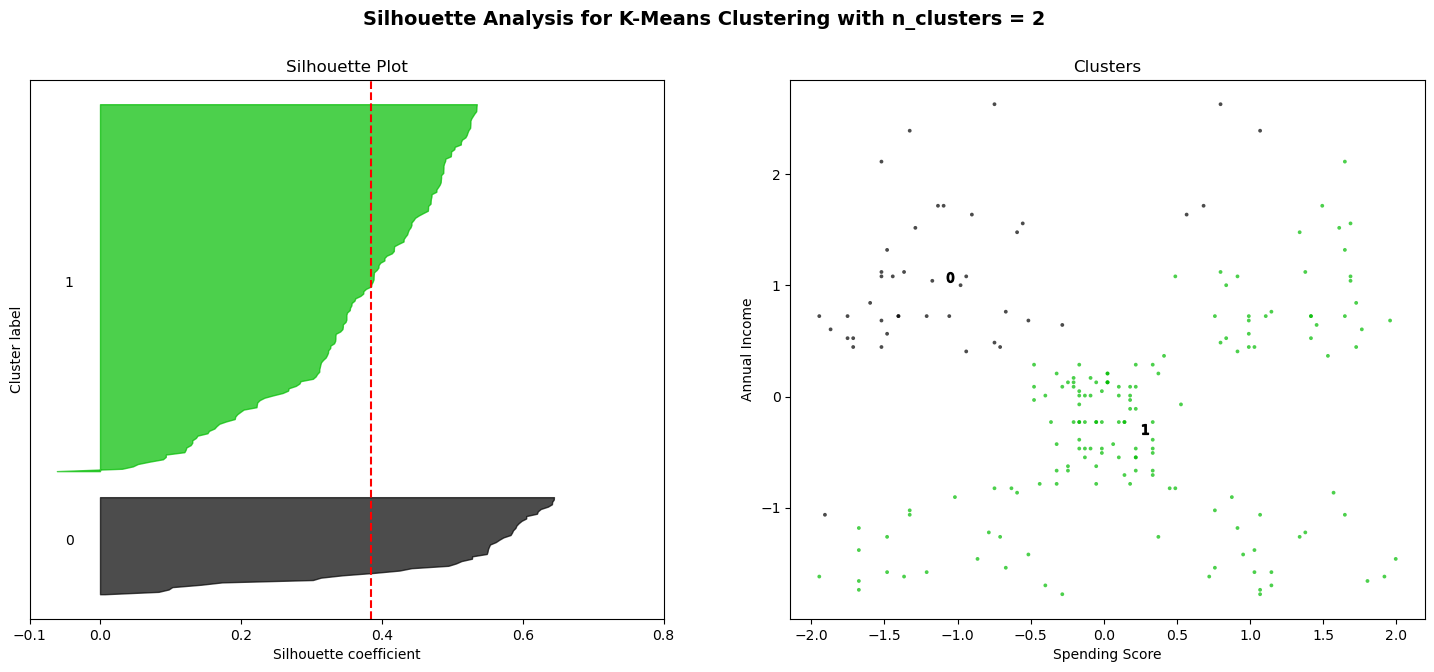

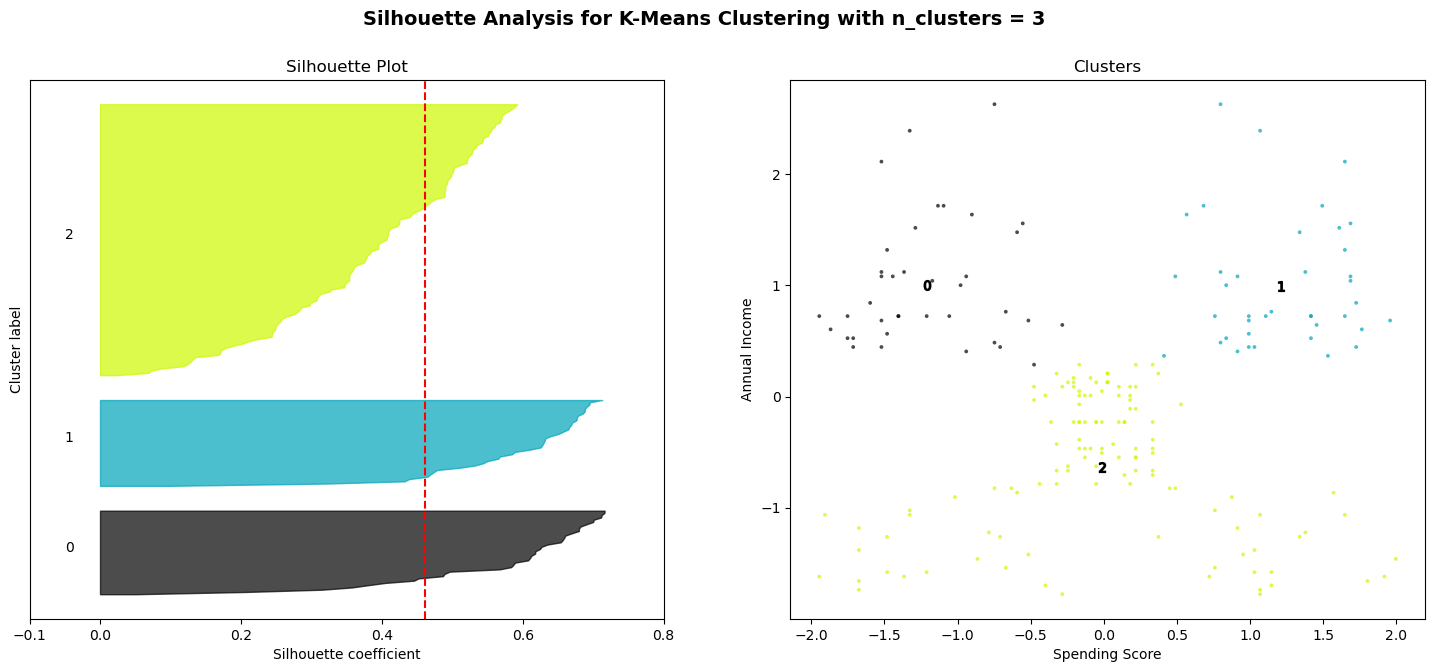

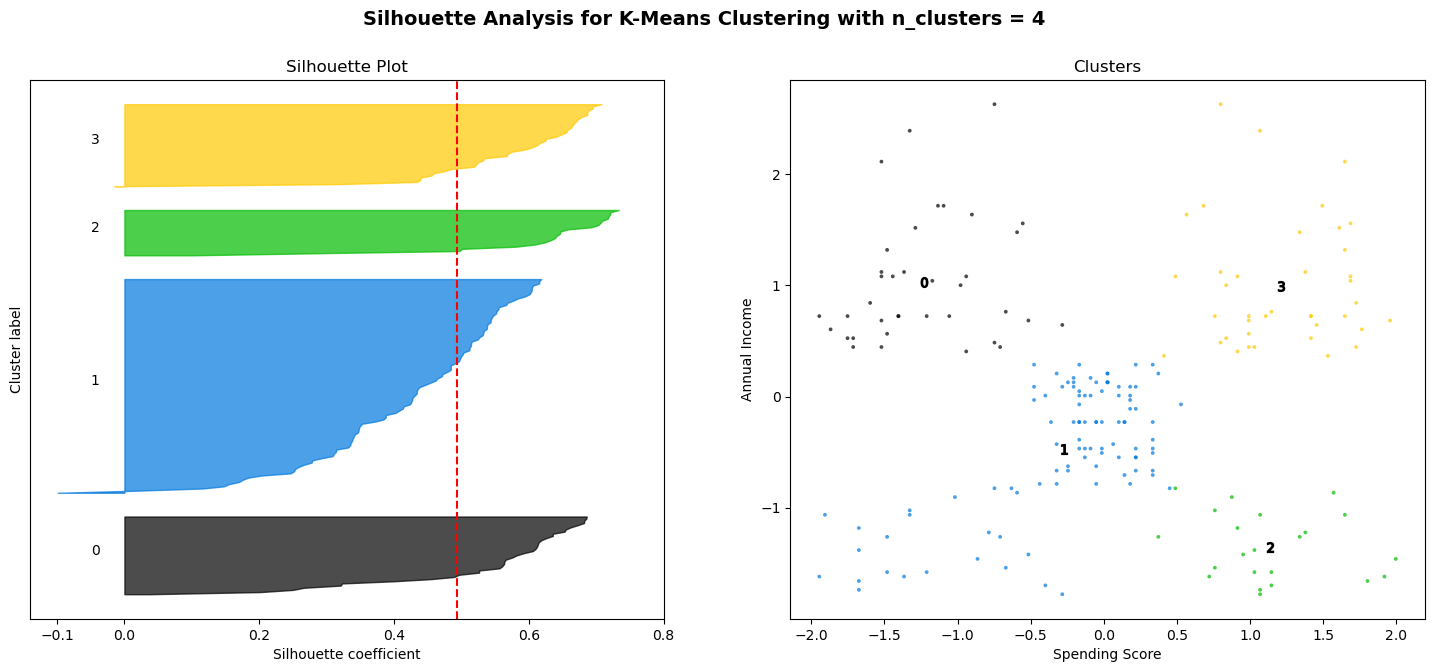

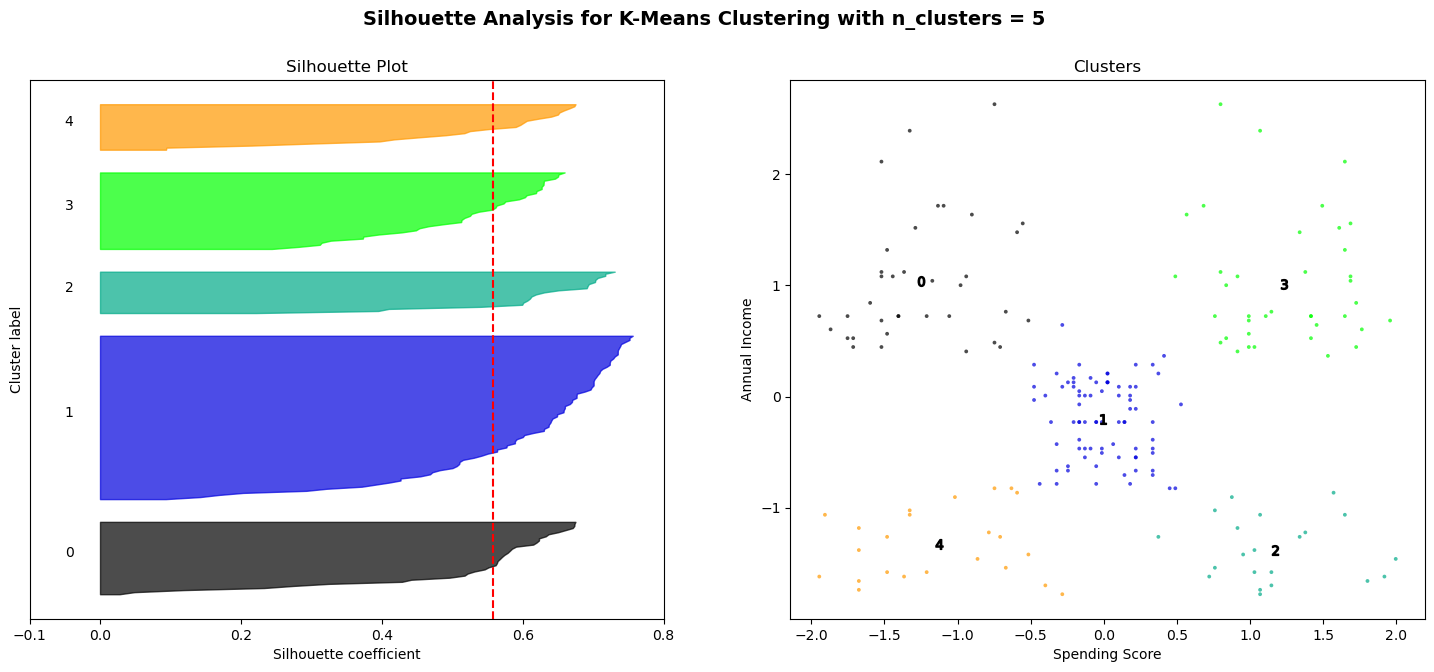

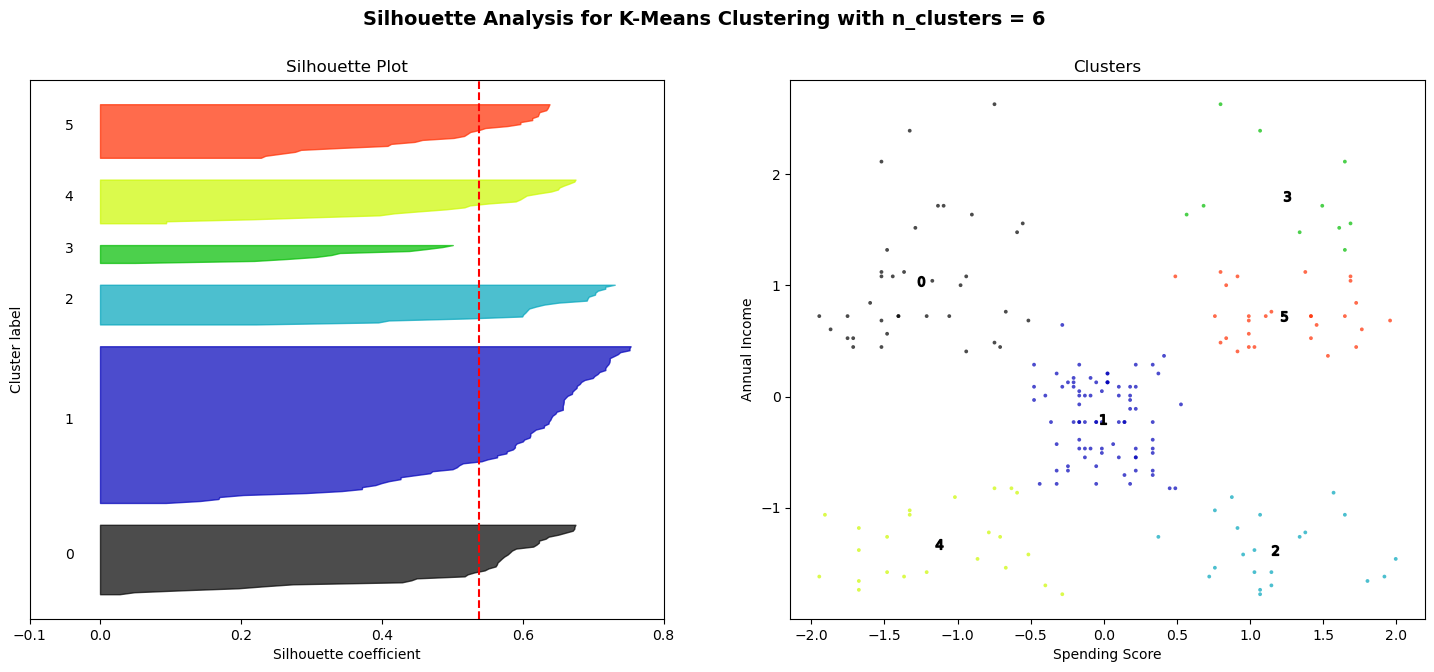

In [27]:
n_clusters = [2, 3, 4, 5, 6]

X = np.array(X)

for K in n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    model = KMeans(n_clusters = K, random_state = 10)    
    cluster_labels = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])      
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)    
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = model.cluster_centers_
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

The above plot shows the silhouette plot and the clusters formed for each value of K. The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K = 2,3,4. Also for K = 6, the 6th cluster has the silhouette score less than the average silhouette score. Thus we can not consider the K values as 2,3,4 and 6. 

Also from the above output, we can see that the silhouette score is maximum for k = 5 and from the plot, we can see that there are no outliers for 5 clusters and all the clusters have silhouette coefficients greater than the average silhouette score. Thus we choose K = 5 as the optimal value of k.

In [28]:
# Let us build the 5 clusters using K-menas clustering.

new_clusters = KMeans(n_clusters = 5, random_state = 10)
new_clusters.fit(X)
df_cust['Cluster'] = new_clusters.labels_

df_cust.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
0,15000,18,44,0,4
1,15000,18,79,0,2
2,16000,23,8,1,4
3,16000,25,79,1,2
4,17000,32,41,1,4


In [29]:
# Check the size of each cluster

df_cust.Cluster.value_counts()

Cluster
1    80
3    38
0    36
4    23
2    21
Name: count, dtype: int64

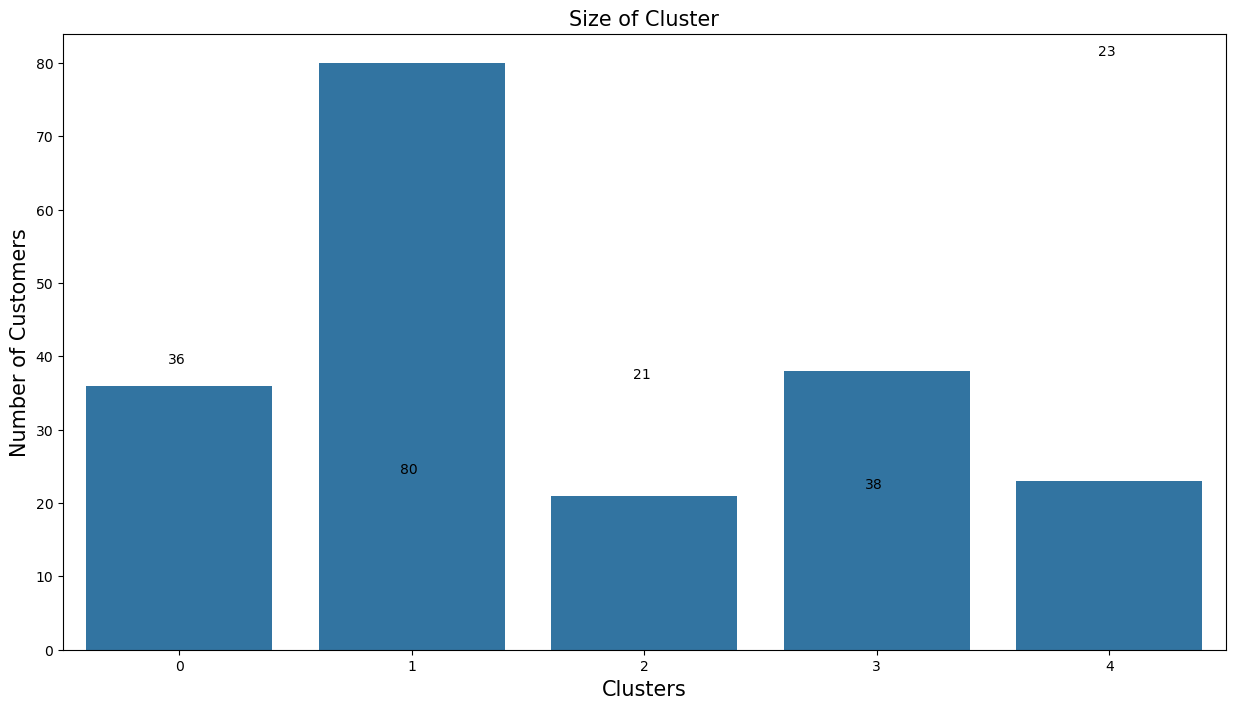

In [32]:
sns.countplot(data= df_cust, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])

plt.show()

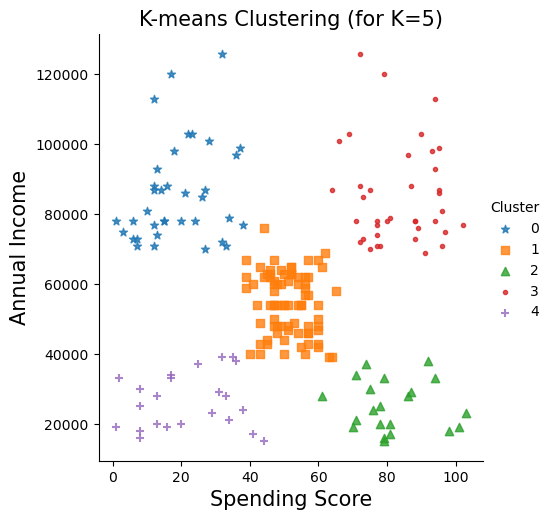

In [34]:
# Let us visualize the clusters by considering the variables 'Cust_Spend_Score' and 'Yearly_Income'.

sns.lmplot(x = 'Cust_Spend_Score', y = 'Yearly_Income', data = df_cust, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False)

plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

plt.show()

__Now let us understand the summary statistics for each cluster.__

In [35]:
# cluster 1

print(len(df_cust[df_cust['Cluster'] == 0]))

df_cust[df_cust.Cluster==0].describe()

36


,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,36.000000,36.000000,36.000000,36.000000
mean,85916.666667,40.805556,18.916667,0.000000
std,14275.603565,10.764544,10.310536,0.000000
min,70000.000000,21.000000,1.000000,0.000000
25%,76500.000000,33.750000,12.000000,0.000000
50%,80000.000000,42.000000,16.500000,0.000000
75%,94000.000000,47.250000,27.000000,0.000000
max,126000.000000,59.000000,38.000000,0.000000


In [36]:
df_cust[df_cust.Cluster==0].describe(include = object)

,Sex
count,36
unique,2
top,0
freq,19


-----